# Esquema de Trabajo:

* Cargar los datos , sean de csv, excel etc....
* Identificar el tipo de problema de modelado: regresión o clasificación
* Preparar datos 
* Separar datos
    * Sin particionamiento: en X, y  
    * Con particionamiento: X_train, X_test, y_train, y_test
* Modelado: usar distintos algoritmos
* Evaluación: métricvas de regresión o métricas de clasisicación
* Despliegue

* Carga de datos

In [1]:
# penguins: body_mass_g
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = sns.load_dataset('penguins')
df.dropna(inplace=True)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


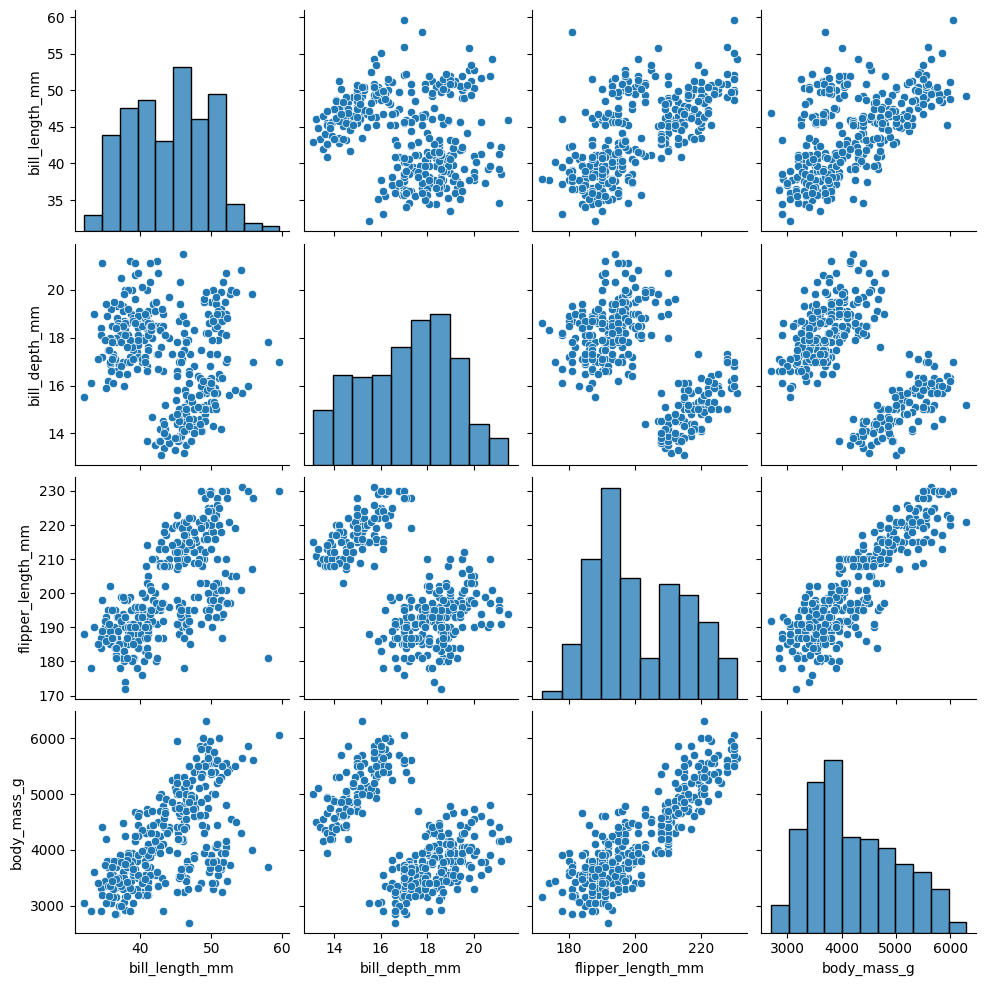

In [2]:
sns.pairplot(df)

* Separar la X y la y

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error

# Separación X y Y
X = df[['bill_length_mm', 'bill_depth_mm','flipper_length_mm' ]]
y = df['body_mass_g']

# DataFrame de resultados

df_resultados = pd.DataFrame(columns=['Modelo', 'R2', 'MAE', 'RMSE', 'MAPE'])

# REGRESIÓN LINEAL MÚLTIPLE
model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred) # * 100 nos da la cifra  error promedio 7,7% respecto del valor de la masa corporal

df_resultados.loc[len(df_resultados)] = ['RML 3 col', r2, mae, rmse,mape]
df_resultados

,Modelo,R2,MAE,RMSE,MAPE
0,RML 3 col,0.763937,310.062518,390.637086,0.077183


* Realizar :
* Enconding: get_dummies
* heatmap corr
* RLM con todas las columnas

In [4]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [5]:
# Encoding

df = pd.get_dummies(df)
df.head()



,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,39.1,18.7,181.0,3750.0,True,False,False,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,True,False,False,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,True,False,False,False,False,True,True,False
4,36.7,19.3,193.0,3450.0,True,False,False,False,False,True,True,False
5,39.3,20.6,190.0,3650.0,True,False,False,False,False,True,False,True


<Axes: >

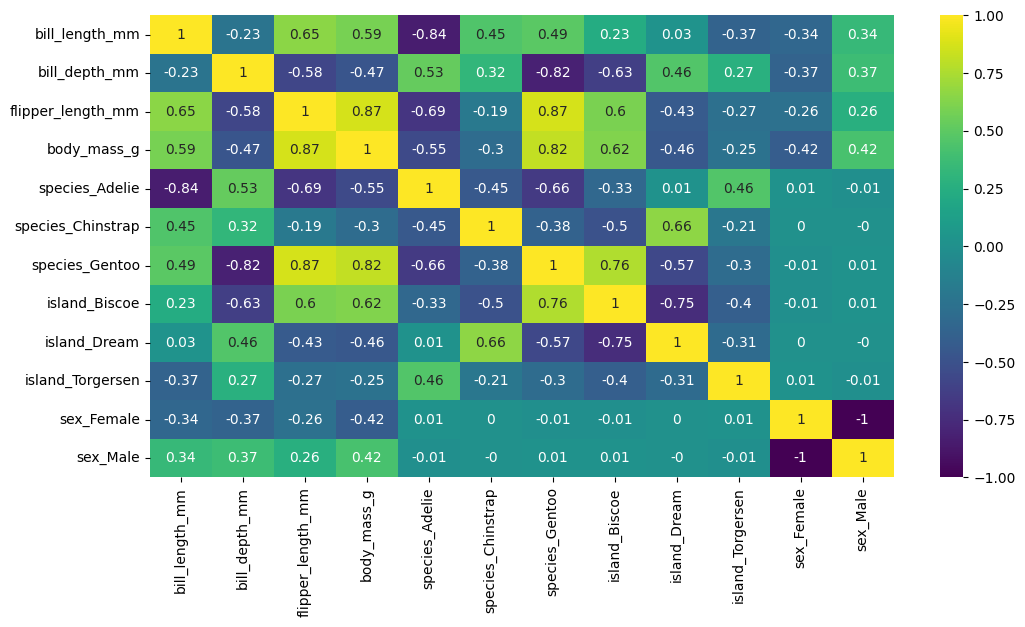

In [6]:

plt.figure(figsize=(12,6))
sns.heatmap(df.corr().round(2), annot=True, cmap='viridis')

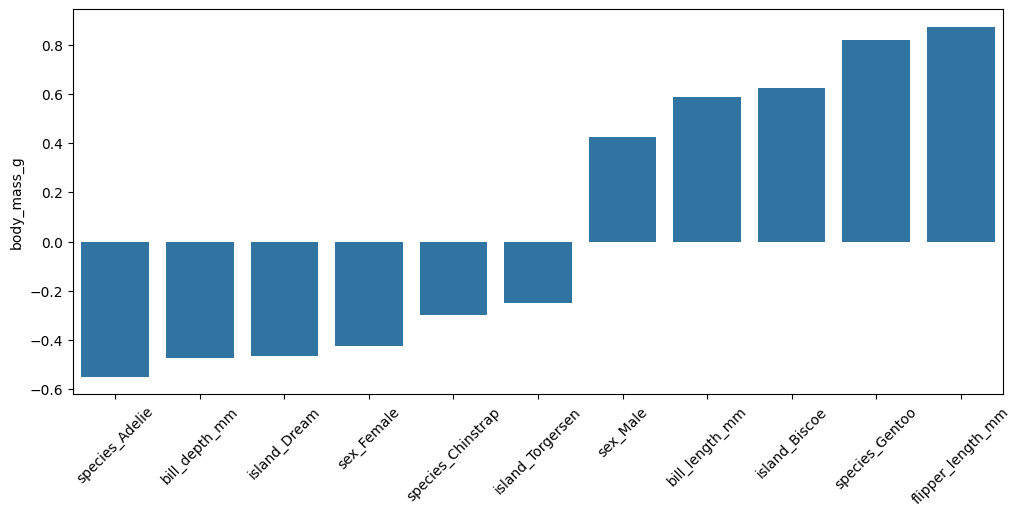

In [7]:
# corr con la columna peso
plt.figure(figsize=(12,5))
sns.barplot(df.corr()['body_mass_g'].drop('body_mass_g').sort_values())
plt.xticks(rotation=45);

In [8]:
# Vemos en el resultado que con la suma de 11 columns. el R2 aumenta, la MAE disminuye, RMSE también, MAPE nos da un error solo del 5,5%
X = df.drop('body_mass_g', axis=1)
y = df['body_mass_g']

# REGRESIÓN LINEAL MÚLTIPLE
model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred) # * 100 nos da la cifra  error promedio 5,5% respecto del valor de la masa corporal

df_resultados.loc[len(df_resultados)] = ['RML 11 col', r2, mae, rmse,mape] # 11 porque son las columnas superiores tanto las que van a 1 como las que van a -1
df_resultados

,Modelo,R2,MAE,RMSE,MAPE
0,RML 3 col,0.763937,310.062518,390.637086,0.077183
1,RML 11 col,0.875223,226.413652,284.005204,0.055982


In [9]:
# RLM con drop first en get_dummies, borra una de las columnas d cada dummies generados para evitar correlación entre ellas

df = sns.load_dataset('penguins')
df.dropna(inplace=True)
df = pd.get_dummies(df, drop_first=True) # Agregar drop_first=True

X = df.drop('body_mass_g', axis=1)
y = df['body_mass_g']

model = LinearRegression()

model.fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

mae = mean_absolute_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred) # error del 5,5 % con respecto de valor real

df_resultados.loc[len(df_resultados)] = ['RLM 8 col', r2, mae, rmse, mape] # Está sería la mejor opción con 8 columnas nos da igual resultado que con 11 columnas
df_resultados



,Modelo,R2,MAE,RMSE,MAPE
0,RML 3 col,0.763937,310.062518,390.637086,0.077183
1,RML 11 col,0.875223,226.413652,284.005204,0.055982
2,RLM 8 col,0.875223,226.413652,284.005204,0.055982


* KNN

In [10]:
# KNN - k Nearest Neighbors
from sklearn.neighbors import KNeighborsRegressor  # esto es un algoritmo que hace regresiones y clasificaciones con calculo de distancias coje los más cercanos

df = sns.load_dataset('penguins')
df.dropna(inplace=True)
df = pd.get_dummies(df, drop_first=True) # Agregar drop_first=True

X = df.drop('body_mass_g', axis=1)
y = df['body_mass_g']

model = KNeighborsRegressor(n_neighbors=2) # POR DEFECTO  N_NEIGHBORS ES 5
model.fit(X, y)
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred) # error del 5,5 % con respecto de valor real

df_resultados.loc[len(df_resultados)] = ['KNN k = 2 ', r2, mae, rmse, mape]
df_resultados


,Modelo,R2,MAE,RMSE,MAPE
0,RML 3 col,0.763937,310.062518,390.637086,0.077183
1,RML 11 col,0.875223,226.413652,284.005204,0.055982
2,RLM 8 col,0.875223,226.413652,284.005204,0.055982
3,KNN k = 2,0.922721,172.409910,223.507101,0.042347


# KNN :
* Computacionalmente costoso, ya que es un lazy o perezoso, realiza los datos en el predict
* no existe un entrenamiento pesado como en los otros métodos, el modelo simplemente almacena los datos en el entrenamiento, y para hacer una predección
* (regresión o clasificación) busca y calcula los K vecinos más cercanos a cada punto o instancia que se quiere predecir

In [11]:
# BUCLE FOR PARA knn PARA ENCONTRAR EL MEJOR VALOR K
# Computacionalmente costoso, ya que es un lazy o perezoso, realiza los datos en el predict
# no existe un entrenamiento pesado como en los otros métodos, el modelo simplemente almacena los datos en el entrenamiento, y para hacer una predección
# (regresión o clasificación) busca y calcula los K vecinos más cercanos a cada punto o instancia que se quiere predecir

for k in range(2, 10):
    
    model = KNeighborsRegressor(n_neighbors=k) # POR DEFECTO  N_NEIGHBORS ES 5
    model.fit(X, y)
    y_pred = model.predict(X)
    
    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = root_mean_squared_error(y, y_pred)
    mape = mean_absolute_percentage_error(y, y_pred) # error del 5,5 % con respecto de valor real

    df_resultados.loc[len(df_resultados)] = [f'KNN k = {k} ', r2, mae, rmse, mape]
    df_resultados
    
df_resultados .sort_values('R2', ascending=False)

,Modelo,R2,MAE,RMSE,MAPE
3,KNN k = 2,0.922721,172.409910,223.507101,0.042347
4,KNN k = 2,0.922721,172.409910,223.507101,0.042347
5,KNN k = 3,0.894704,204.179179,260.894981,0.050295
6,KNN k = 4,0.885988,211.524024,271.477923,0.051974
7,KNN k = 5,0.876481,220.420420,282.569718,0.054214
1,RML 11 col,0.875223,226.413652,284.005204,0.055982
2,RLM 8 col,0.875223,226.413652,284.005204,0.055982
8,KNN k = 6,0.874647,223.961461,284.660507,0.055181
9,KNN k = 7,0.869713,227.670528,290.208117,0.056204
10,KNN k = 8,0.865178,231.719219,295.216096,0.056983


# Hacer un escalado y volver hacer el bucle con el KNN

In [12]:
# KNN es sensible al escalado debido al cálculo de distancias

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

for k in range(2,10):
    
   model = KNeighborsRegressor(n_neighbors=k) # este valor es igual al de los resultados
   model.fit(X_scaled, y)

   y_pred = model.predict(X_scaled)


   r2 = r2_score(y, y_pred)
   mae = mean_absolute_error(y, y_pred)
   rmse = root_mean_squared_error(y, y_pred)
   mape = mean_absolute_percentage_error(y, y_pred) # error del 5,5 % con respecto de valor real

   df_resultados.loc[len(df_resultados)] = [f'KNN scaled k = {k} ', r2, mae, rmse, mape]
   df_resultados

df_resultados.sort_values('R2', ascending=False)

,Modelo,R2,MAE,RMSE,MAPE
12,KNN scaled k = 2,0.938673,157.057057,199.106488,0.038662
3,KNN k = 2,0.922721,172.409910,223.507101,0.042347
4,KNN k = 2,0.922721,172.409910,223.507101,0.042347
13,KNN scaled k = 3,0.922368,180.230230,224.015847,0.044620
14,KNN scaled k = 4,0.908940,194.050300,242.618359,0.048178
15,KNN scaled k = 5,0.903271,197.267267,250.056150,0.048960
16,KNN scaled k = 6,0.895868,205.993493,259.448877,0.051121
5,KNN k = 3,0.894704,204.179179,260.894981,0.050295
17,KNN scaled k = 7,0.894332,207.346632,261.355529,0.051363
18,KNN scaled k = 8,0.891224,209.984985,265.171347,0.051982


In [13]:
# Particionamiento para Regresión lineal múltiple

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) # error del 5,5 % con respecto de valor real

df_resultados.loc[len(df_resultados)] = ['RLM 8 col (test)', r2, mae, rmse, mape] # Está sería la mejor opción con 8 columnas nos da igual resultado que con 11 columnas
df_resultados.sort_values('R2', ascending=False)


,Modelo,R2,MAE,RMSE,MAPE
12,KNN scaled k = 2,0.938673,157.057057,199.106488,0.038662
3,KNN k = 2,0.922721,172.409910,223.507101,0.042347
4,KNN k = 2,0.922721,172.409910,223.507101,0.042347
13,KNN scaled k = 3,0.922368,180.230230,224.015847,0.044620
14,KNN scaled k = 4,0.908940,194.050300,242.618359,0.048178
15,KNN scaled k = 5,0.903271,197.267267,250.056150,0.048960
20,RLM 8 col (test),0.896169,196.208892,255.749079,0.048622
16,KNN scaled k = 6,0.895868,205.993493,259.448877,0.051121
5,KNN k = 3,0.894704,204.179179,260.894981,0.050295
17,KNN scaled k = 7,0.894332,207.346632,261.355529,0.051363


In [14]:
#Particionamiento para Regresión lineal múltiple KNN  2

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

for k in range(2,10):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) # error del 5,5 % con respecto de valor real

    df_resultados.loc[len(df_resultados)] = [f'KNN k = {k}  (test)', r2, mae, rmse, mape] # en el entrenamiento nos sale mejor que con test KNN k = 2 (test)	0.809014 resultado
    df_resultados.sort_values('R2', ascending=False)
    

In [15]:
df_resultados

,Modelo,R2,MAE,RMSE,MAPE
0,RML 3 col,0.763937,310.062518,390.637086,0.077183
1,RML 11 col,0.875223,226.413652,284.005204,0.055982
2,RLM 8 col,0.875223,226.413652,284.005204,0.055982
3,KNN k = 2,0.922721,172.409910,223.507101,0.042347
4,KNN k = 2,0.922721,172.409910,223.507101,0.042347
5,KNN k = 3,0.894704,204.179179,260.894981,0.050295
6,KNN k = 4,0.885988,211.524024,271.477923,0.051974
7,KNN k = 5,0.876481,220.420420,282.569718,0.054214
8,KNN k = 6,0.874647,223.961461,284.660507,0.055181
9,KNN k = 7,0.869713,227.670528,290.208117,0.056204


# Particionamiento con escalado para KNN: MinMaxScaler

In [16]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42) # Aquí hacemos el 80% (X_train) del particionamiento de los datos que conocemos y nos queda el 20% son test

scaler = MinMaxScaler()

# Introduce data leakage o fuga de datos
# Porque entrena el scaler con datos de test que usar para escalar datos de train que enseña al modelo
# Por tanto el modelo está recibiendo datos escalados influenciados por datos test

X_train_scaled = scaler.fit_transform(X_train) # se calculan sobre el 80% fit.transform solo entrenamiento
X_test_scaled = scaler.transform(X_test)

for k in range(2,10):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) 

    df_resultados.loc[len(df_resultados)] = [f'KNN scaled k = {k}  (test)', r2, mae, rmse, mape] # en el entrenamiento 
  
    


In [17]:
df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains(('test'))]

C:\Users\varso\AppData\Local\Temp\ipykernel_14972\3878628868.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains(('test'))]


,Modelo,R2,MAE,RMSE,MAPE
20,RLM 8 col (test),0.896169,196.208892,255.749079,0.048622
36,KNN scaled k = 9 (test),0.879003,215.132670,276.081262,0.054252
30,KNN scaled k = 3 (test),0.875117,220.895522,280.480221,0.055299
33,KNN scaled k = 6 (test),0.874876,216.417910,280.750778,0.054469
35,KNN scaled k = 8 (test),0.874276,217.397388,281.422781,0.054830
32,KNN scaled k = 5 (test),0.871614,223.059701,284.386614,0.055861
34,KNN scaled k = 7 (test),0.868386,223.347548,287.939099,0.056255
31,KNN scaled k = 4 (test),0.866294,228.358209,290.218732,0.057319
25,KNN k = 6 (test),0.857163,236.442786,299.964585,0.059184
27,KNN k = 8 (test),0.852071,237.266791,305.264893,0.058990


In [18]:
# StandarScaler en regresión múltiple

from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# Estandarización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) 

df_resultados.loc[len(df_resultados)] = ['RLM 8 col scaled (test)', r2, mae, rmse, mape]


In [19]:
df_resultados.sort_values('R2', ascending=False)

,Modelo,R2,MAE,RMSE,MAPE
12,KNN scaled k = 2,0.938673,157.057057,199.106488,0.038662
4,KNN k = 2,0.922721,172.409910,223.507101,0.042347
3,KNN k = 2,0.922721,172.409910,223.507101,0.042347
13,KNN scaled k = 3,0.922368,180.230230,224.015847,0.044620
14,KNN scaled k = 4,0.908940,194.050300,242.618359,0.048178
15,KNN scaled k = 5,0.903271,197.267267,250.056150,0.048960
20,RLM 8 col (test),0.896169,196.208892,255.749079,0.048622
37,RLM 8 col scaled (test),0.896169,196.208892,255.749079,0.048622
16,KNN scaled k = 6,0.895868,205.993493,259.448877,0.051121
5,KNN k = 3,0.894704,204.179179,260.894981,0.050295


## Árbol de decisión para Regresión

* Fácil interpretabilidad, scikit nos muestra el árbol resultante en texto o imagen
* No necesita el escalado como en el KNN
* No le afecta tanto los outliers como al KNN
* Hace automáticamente los cortes para decidir los nodos
* Importante: Ajustar la profundidad para evitar overfitting o sobreajuste
* Por si solo puede ser débil, suele usarse en conbinación de muchos árboles creando así un Random Forest
* Sensible si hay pocos datos
* Detecta automáticamente las Categóricas

In [20]:
# Vamos a probrar con un algoritmo nuevo llamado Tree para si mejoramos RLM de 8 col.
# Sin particionamiento
# de 2 a 10 niveles de profundidad

from sklearn.tree import DecisionTreeRegressor,export_text, plot_tree

# Estandarización
model = DecisionTreeRegressor(max_depth=3) # esto es profundidad 3
model.fit(X, y)

y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred) 

df_resultados.loc[len(df_resultados)] = ['DTR depth 3', r2, mae, rmse, mape] # Sobre los datos entrenamiento haciendo todo
df_resultados.sort_values('R2', ascending=False)

,Modelo,R2,MAE,RMSE,MAPE
12,KNN scaled k = 2,0.938673,157.057057,199.106488,0.038662
4,KNN k = 2,0.922721,172.409910,223.507101,0.042347
3,KNN k = 2,0.922721,172.409910,223.507101,0.042347
13,KNN scaled k = 3,0.922368,180.230230,224.015847,0.044620
14,KNN scaled k = 4,0.908940,194.050300,242.618359,0.048178
15,KNN scaled k = 5,0.903271,197.267267,250.056150,0.048960
20,RLM 8 col (test),0.896169,196.208892,255.749079,0.048622
37,RLM 8 col scaled (test),0.896169,196.208892,255.749079,0.048622
16,KNN scaled k = 6,0.895868,205.993493,259.448877,0.051121
5,KNN k = 3,0.894704,204.179179,260.894981,0.050295


In [21]:
# Ver el árbol en forma texto

print(export_text(model, feature_names=X.columns))

|--- species_Gentoo <= 0.50
|   |--- sex_Male <= 0.50
|   |   |--- bill_depth_mm <= 17.15
|   |   |   |--- value: [3281.08]
|   |   |--- bill_depth_mm >  17.15
|   |   |   |--- value: [3492.14]
|   |--- sex_Male >  0.50
|   |   |--- flipper_length_mm <= 194.50
|   |   |   |--- value: [3889.80]
|   |   |--- flipper_length_mm >  194.50
|   |   |   |--- value: [4112.07]
|--- species_Gentoo >  0.50
|   |--- sex_Male <= 0.50
|   |   |--- flipper_length_mm <= 210.50
|   |   |   |--- value: [4472.73]
|   |   |--- flipper_length_mm >  210.50
|   |   |   |--- value: [4806.25]
|   |--- sex_Male >  0.50
|   |   |--- bill_length_mm <= 47.45
|   |   |   |--- value: [5238.46]
|   |   |--- bill_length_mm >  47.45
|   |   |   |--- value: [5551.56]



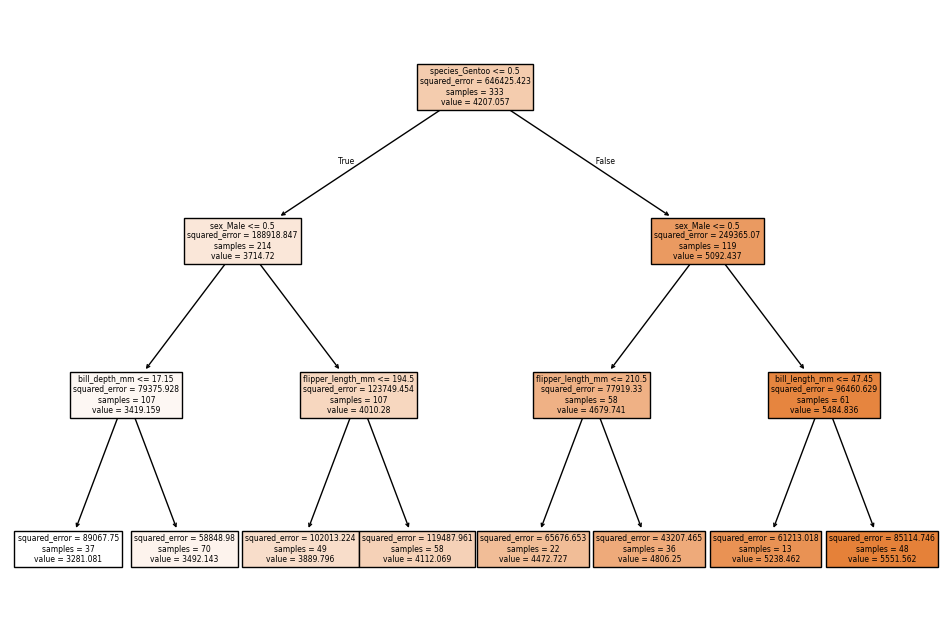

In [22]:
# ver el árbol de forma gráfica
plt.figure(figsize=(12,8))
plot_tree(model, feature_names=X.columns, filled=True);

In [23]:


# Estandarización
for depth in range(2,10):
    model = DecisionTreeRegressor(max_depth=depth) # esto es profundidad depth que es el bucle
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) 

    df_resultados.loc[len(df_resultados)] = [f'DTR depth {depth}', r2, mae, rmse, mape] # Sobre los datos entrenamiento haciendo todo
 

In [24]:
df_resultados.sort_values('R2', ascending=False).head(25)

,Modelo,R2,MAE,RMSE,MAPE
12,KNN scaled k = 2,0.938673,157.057057,199.106488,0.038662
4,KNN k = 2,0.922721,172.409910,223.507101,0.042347
3,KNN k = 2,0.922721,172.409910,223.507101,0.042347
13,KNN scaled k = 3,0.922368,180.230230,224.015847,0.044620
14,KNN scaled k = 4,0.908940,194.050300,242.618359,0.048178
15,KNN scaled k = 5,0.903271,197.267267,250.056150,0.048960
20,RLM 8 col (test),0.896169,196.208892,255.749079,0.048622
37,RLM 8 col scaled (test),0.896169,196.208892,255.749079,0.048622
16,KNN scaled k = 6,0.895868,205.993493,259.448877,0.051121
5,KNN k = 3,0.894704,204.179179,260.894981,0.050295


In [25]:
print(export_text(model,feature_names=X.columns))

|--- species_Gentoo <= 0.50
|   |--- sex_Male <= 0.50
|   |   |--- bill_depth_mm <= 16.95
|   |   |   |--- bill_length_mm <= 37.90
|   |   |   |   |--- flipper_length_mm <= 182.00
|   |   |   |   |   |--- island_Dream <= 0.50
|   |   |   |   |   |   |--- value: [2850.00]
|   |   |   |   |   |--- island_Dream >  0.50
|   |   |   |   |   |   |--- value: [2900.00]
|   |   |   |   |--- flipper_length_mm >  182.00
|   |   |   |   |   |--- island_Dream <= 0.50
|   |   |   |   |   |   |--- bill_depth_mm <= 16.75
|   |   |   |   |   |   |   |--- bill_length_mm <= 36.80
|   |   |   |   |   |   |   |   |--- value: [3050.00]
|   |   |   |   |   |   |   |--- bill_length_mm >  36.80
|   |   |   |   |   |   |   |   |--- value: [3075.00]
|   |   |   |   |   |   |--- bill_depth_mm >  16.75
|   |   |   |   |   |   |   |--- value: [3150.00]
|   |   |   |   |   |--- island_Dream >  0.50
|   |   |   |   |   |   |--- bill_length_mm <= 34.55
|   |   |   |   |   |   |   |--- value: [3050.00]
|   |   |   |   

In [26]:
# Con particionamiento

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

for depth in range(2,10):
    model = DecisionTreeRegressor(max_depth=depth) # esto es profundidad depth que es el bucle
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) 

    df_resultados.loc[len(df_resultados)] = [f'DTR depth {depth} (test)', r2, mae, rmse, mape]

In [27]:
df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains('DTR')]

C:\Users\varso\AppData\Local\Temp\ipykernel_14972\725560397.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains('DTR')]


,Modelo,R2,MAE,RMSE,MAPE
38,DTR depth 3,0.873522,224.806433,285.934100,0.055847
47,DTR depth 2 (test),0.867135,224.532382,289.304823,0.056626
39,DTR depth 2,0.867135,224.532382,289.304823,0.056626
49,DTR depth 4 (test),0.863858,235.921803,292.850421,0.058694
41,DTR depth 4,0.863858,235.921803,292.850421,0.058694
48,DTR depth 3 (test),0.859232,234.635980,297.784135,0.057911
40,DTR depth 3,0.859232,234.635980,297.784135,0.057911
50,DTR depth 5 (test),0.854761,250.932869,302.477149,0.062561
42,DTR depth 5,0.854761,250.932869,302.477149,0.062561
43,DTR depth 6,0.830910,260.003634,326.369113,0.063915


# Random Forest , combina varios algoritmos de árboles y son más potentes

In [28]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

for depth in range(2,15):
    model = RandomForestRegressor(max_depth=depth) # este usa 100 árboles
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) 

    df_resultados.loc[len(df_resultados)] = [f'RF depth {depth} (test)', r2, mae, rmse, mape]

In [29]:
df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains('test')]

C:\Users\varso\AppData\Local\Temp\ipykernel_14972\3918536935.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains('test')]


,Modelo,R2,MAE,RMSE,MAPE
20,RLM 8 col (test),0.896169,196.208892,255.749079,0.048622
37,RLM 8 col scaled (test),0.896169,196.208892,255.749079,0.048622
57,RF depth 4 (test),0.885748,213.676091,268.276653,0.053589
58,RF depth 5 (test),0.884000,213.715821,270.320513,0.053255
56,RF depth 3 (test),0.881795,214.392286,272.877220,0.053894
59,RF depth 6 (test),0.881420,222.858331,273.310528,0.055526
36,KNN scaled k = 9 (test),0.879003,215.132670,276.081262,0.054252
61,RF depth 8 (test),0.875162,229.084875,280.429285,0.057062
30,KNN scaled k = 3 (test),0.875117,220.895522,280.480221,0.055299
33,KNN scaled k = 6 (test),0.874876,216.417910,280.750778,0.054469


# SVM - Suport vector Machines. Lo usaremos para datos no Lineales
* SVR Regresión: https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html
* SVC Clasificación : https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html
                      https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html

* Mapea los datos a más dimensiones para poder separarlos
    * kernel polinómico
    * kernel rbf

* Encontrar linea un hiperplano que separe los puntos de la mejor manera y más clara. Cuánto mayor sean los grupos separados y creen como círculos mejor será el resultado

* C: controla cuánto penalizamos por salirse del margen o banda
    * 0.01, 0.1, 1, 10
    * Grado de penalización por error
    * Si es bajo tolera más errores, prioriza la banda ancha

* Epsilon: grosor de la banda o margen de no penalización, si es grande hay más tolerancia permite que los puntos se alejen
    * Cuándo más grande es el epsilon, más ancho es el tubo, mayor tolerancia al error
    * Por defecto: 0.1
    
* kernel: lineal, polinómico, rbf


In [30]:
from sklearn.svm import SVC, SVR
# help(SVR)

model = SVR()
c_values = [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 100, 500, 1000, 1000000] # Cuánta más alto es el valor menos errores y nos sube más el R2, pero tenemos un límite , cuándo veamos no hay mejora
epsilon_values = [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 100] # más cercano no habría margen para error, muy sensible a errores pequeños
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
 
 # Bucle dentro de otro Bucle
for c in c_values:
    for e in epsilon_values:
            
        model = SVR(C=c, epsilon=e) # epsilon si es cercano a 0 no habra margen para error

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = root_mean_squared_error(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred) 

    df_resultados.loc[len(df_resultados)] = [f'SVR C {c} e {e} (test)', r2, mae, rmse, mape]

In [32]:
df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains('test')]

C:\Users\varso\AppData\Local\Temp\ipykernel_14972\3918536935.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_resultados.sort_values('R2', ascending=False)[df_resultados['Modelo'].str.contains('test')]


,Modelo,R2,MAE,RMSE,MAPE
20,RLM 8 col (test),0.896169,196.208892,255.749079,0.048622
37,RLM 8 col scaled (test),0.896169,196.208892,255.749079,0.048622
78,SVR C 1000000 e 100 (test),0.891058,204.198992,261.967668,0.050620
57,RF depth 4 (test),0.885748,213.676091,268.276653,0.053589
58,RF depth 5 (test),0.884000,213.715821,270.320513,0.053255
56,RF depth 3 (test),0.881795,214.392286,272.877220,0.053894
59,RF depth 6 (test),0.881420,222.858331,273.310528,0.055526
36,KNN scaled k = 9 (test),0.879003,215.132670,276.081262,0.054252
61,RF depth 8 (test),0.875162,229.084875,280.429285,0.057062
30,KNN scaled k = 3 (test),0.875117,220.895522,280.480221,0.055299
